In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

### Shape of data

In [3]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [4]:
y_train_valid -= 769
y_test -= 769

In [8]:
perm = np.random.permutation(X_train_valid.shape[0])
numTrain = int(0.8*X_train_valid.shape[0])
numVal = X_train_valid.shape[0] - numTrain
Xtrain = X_train_valid[perm[0:numTrain]]
ytrain = y_train_valid[perm[0:numTrain]]
Xval = X_train_valid[perm[numTrain: ]]
yval = y_train_valid[perm[numTrain: ]]

In [9]:
Xtrain.shape

(1692, 22, 1000)

In [2]:
from keras import layers, models


In [6]:
hidden_dim = 20

In [10]:
model = models.Sequential()
model.add(layers.Permute((2, 1), input_shape=(22, 1000)))
model.add(layers.SimpleRNN(hidden_dim))
model.add(layers.Dense(4, activation='softmax'))
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_1 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                860       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 84        
Total params: 944
Trainable params: 944
Non-trainable params: 0
_________________________________________________________________


In [12]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn = layers.SimpleRNN(hidden_dim)(p1)
outputs = layers.Dense(4, activation='softmax')(rnn)

In [13]:
model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
permute_2 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 20)                860       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 84        
Total params: 944
Trainable params: 944
Non-trainable params: 0
_________________________________________________________________


In [15]:
loss_hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), epochs=10)


Train on 1692 samples, validate on 423 samples
Epoch 1/10
1692/1692 [==============================] - 10s 6ms/step - loss: 1.6787 - acc: 0.2535 - val_loss: 1.5432 - val_acc: 0.2600
Epoch 2/10
1692/1692 [==============================] - 9s 6ms/step - loss: 1.4862 - acc: 0.2624 - val_loss: 1.5061 - val_acc: 0.2411
Epoch 3/10
1692/1692 [==============================] - 8s 5ms/step - loss: 1.4502 - acc: 0.2665 - val_loss: 1.5021 - val_acc: 0.2175
Epoch 4/10
1692/1692 [==============================] - 8s 5ms/step - loss: 1.4266 - acc: 0.2819 - val_loss: 1.4861 - val_acc: 0.2388
Epoch 5/10
1692/1692 [==============================] - 7s 4ms/step - loss: 1.4110 - acc: 0.2890 - val_loss: 1.4831 - val_acc: 0.2388
Epoch 6/10
1692/1692 [==============================] - 8s 5ms/step - loss: 1.4025 - acc: 0.2872 - val_loss: 1.4745 - val_acc: 0.2411
Epoch 7/10
1692/1692 [==============================] - 8s 5ms/step - loss: 1.3942 - acc: 0.3038 - val_loss: 1.4681 - val_acc: 0.2459
Epoch 8/10
16

In [16]:
type(loss_hist)

keras.callbacks.callbacks.History

In [17]:
hist = loss_hist.history
list(hist)

['val_loss', 'val_acc', 'loss', 'acc']

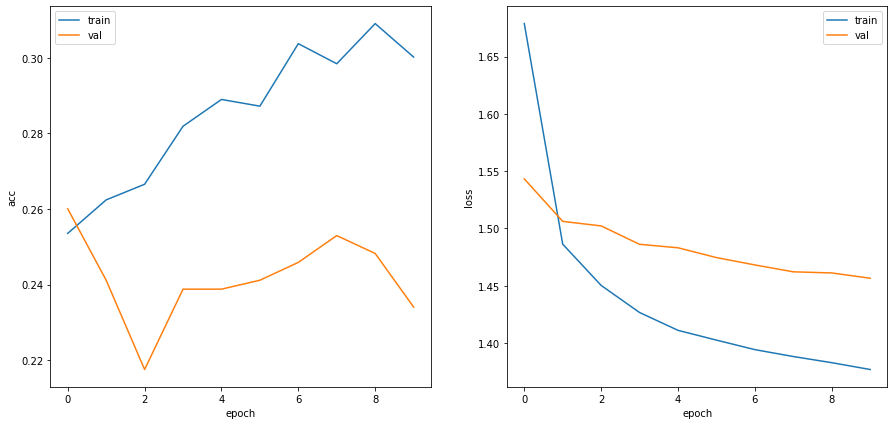

In [18]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])